In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector
from math import sqrt
from sklearn.model_selection import GridSearchCV, KFold
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest

In [11]:
df=pd.read_csv('/Users/parmikenia/Desktop/internship codes/validation dataset2.csv')

In [12]:
X = df.drop(columns=['Customer_ID','Credit_Score'])
y = df['Credit_Score']

In [4]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)

# Step 2: Initialize RFE with the model and choose the number of features to select (e.g., 5)
rfe = RFE(dt_model, n_features_to_select=5)

# Step 3: Fit RFE on the data
rfe.fit(X, y)

# Step 4: Get the selected features
X_rfe = rfe.transform(X)

# Step 5: Train the linear regression model on the selected features
dt_model.fit(X_rfe, y)

# Step 6: Make predictions
y_pred = dt_model.predict(X_rfe)

# Step 7: Calculate MSE, RMSE, and MAE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

# Output the results
print("Selected Features:", rfe.support_)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Selected Features: [False  True False  True False False False False False False False False
 False False False False  True False  True  True]
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Error (MAE): 0.0


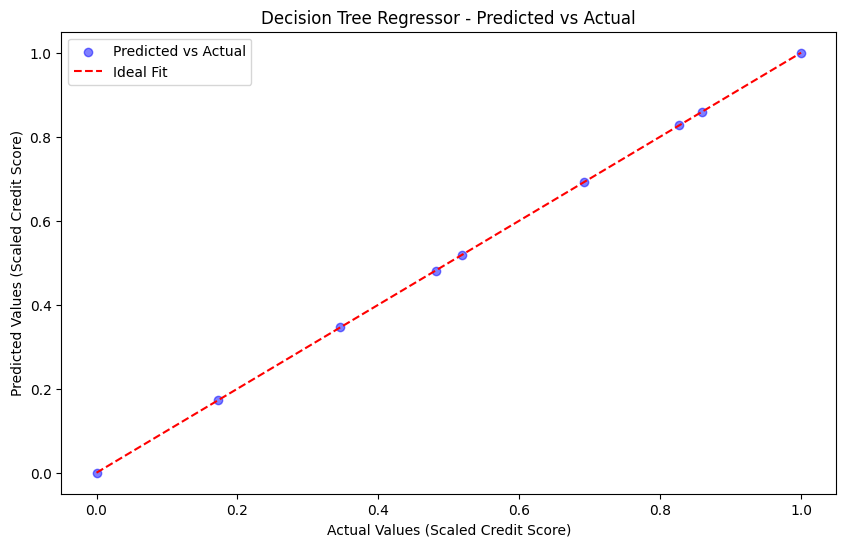

In [14]:
# Plot Regression Line (Actual vs. Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color="blue", alpha=0.5, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Values (Scaled Credit Score)")
plt.ylabel("Predicted Values (Scaled Credit Score)")
plt.title("Decision Tree Regressor - Predicted vs Actual")
plt.legend()
plt.show()